In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
column_names = [
    "pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
    "sacral_slope", "pelvic_radius", "spondylolisthesis", "class"
]
vertebal_column_dataset = pd.read_csv("column_2C.dat", delim_whitespace=True, header=None, names=column_names)
# delim_whitespace : Specifies whether or not whitespace will be used as the sep delimiter

In [3]:
vertebal_column_dataset["class"] = vertebal_column_dataset["class"].map({"NO": 0, "AB": 1})
vertebal_column_dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


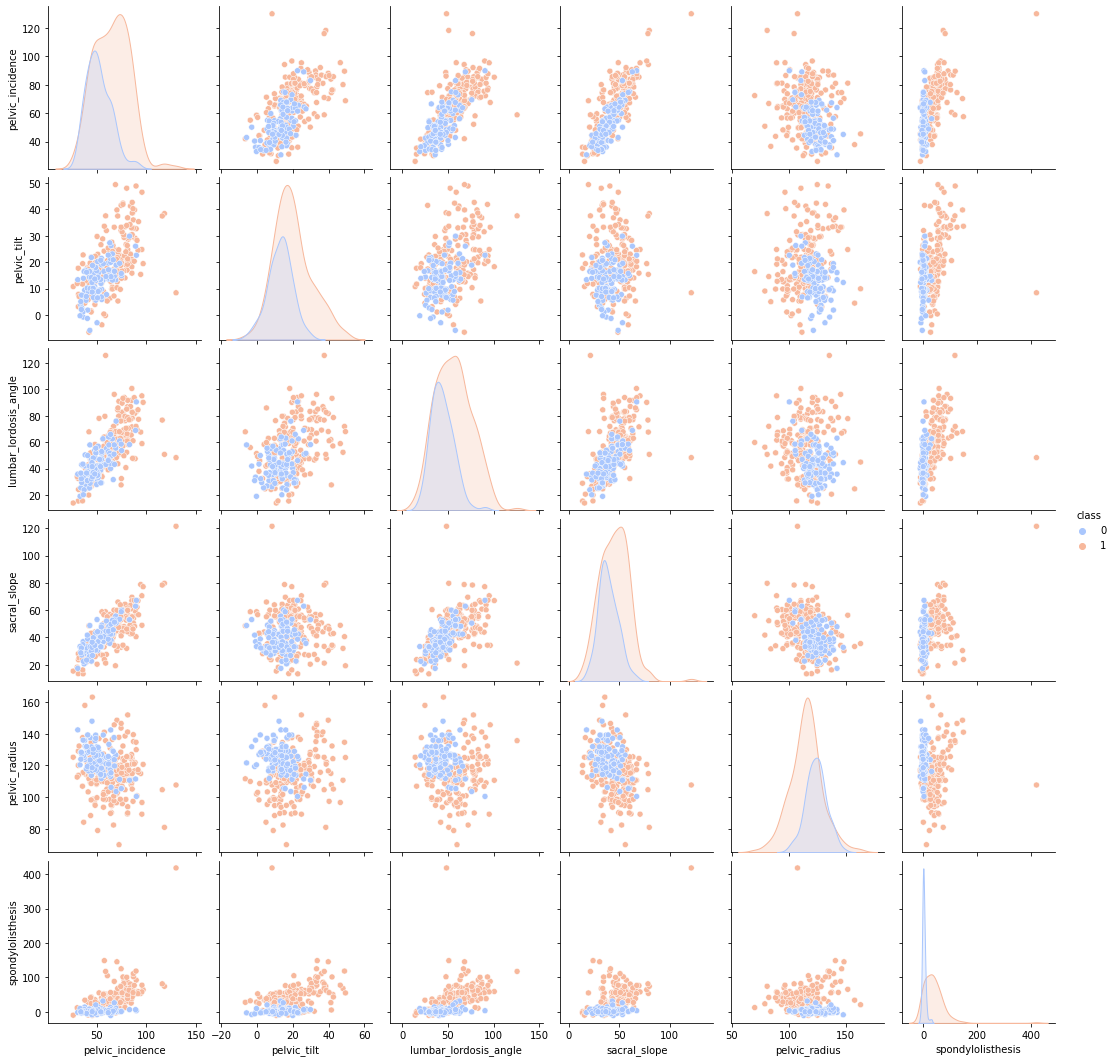

In [4]:
sns.pairplot(vertebal_column_dataset, hue="class", palette="coolwarm")
# hue : name of variable in data
# palette : dict or seaborn color palette

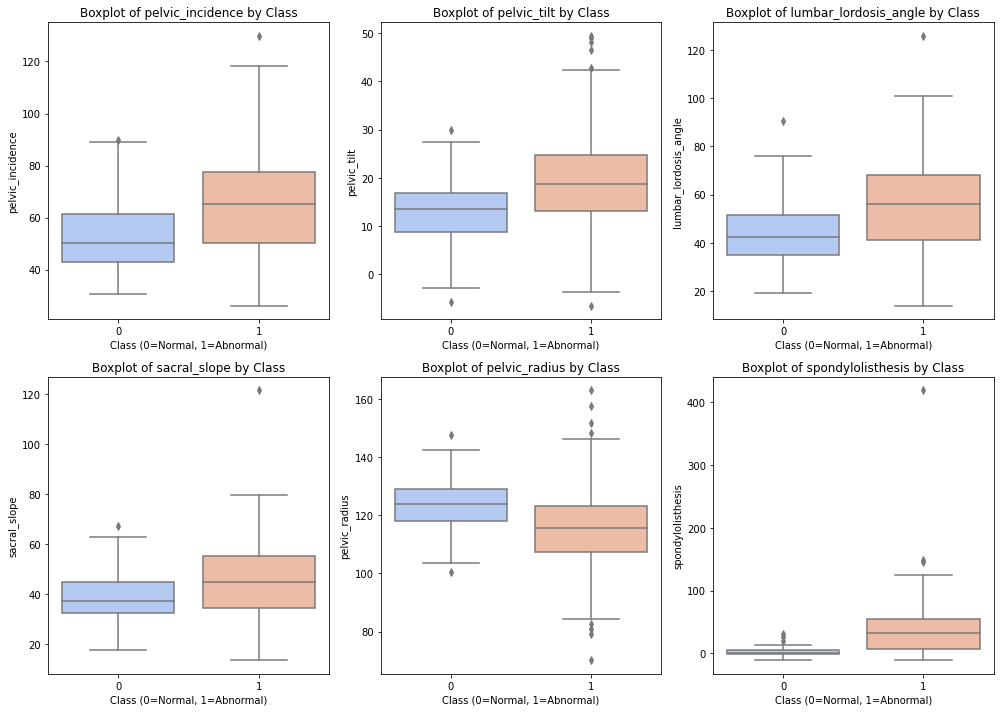

In [5]:
features = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
            "sacral_slope", "pelvic_radius", "spondylolisthesis"]

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=vertebal_column_dataset["class"], y=vertebal_column_dataset[feature], palette="coolwarm")
    plt.title(f"Boxplot of {feature} by Class")
    plt.xlabel("Class (0=Normal, 1=Abnormal)")
plt.tight_layout()
plt.show()

In [6]:
print("Class Distribution:")
print(vertebal_column_dataset["class"].value_counts())

Class Distribution:
1    210
0    100
Name: class, dtype: int64


In [7]:
class_0 = vertebal_column_dataset[vertebal_column_dataset["class"] == 0]
class_1 = vertebal_column_dataset[vertebal_column_dataset["class"] == 1]

In [8]:
train_class_0 = class_0.iloc[:70]
train_class_1 = class_1.iloc[:140]
train_data = pd.concat([train_class_0, train_class_1])

In [9]:
train_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis,class
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [10]:
test_data = vertebal_column_dataset.drop(train_data.index)

In [11]:
test_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis,class
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [12]:
X_train = train_data.drop(columns=["class"])
y_train = train_data["class"]
X_test = test_data.drop(columns=["class"])
y_test = test_data["class"]

In [13]:
k_values = list(range(208, 0, -3))
train_errors = []
test_errors = []

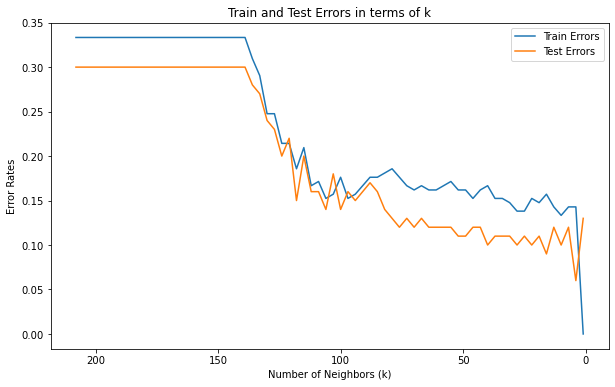

In [14]:
for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    KNN.fit(X_train, y_train)
    
    train_pred = KNN.predict(X_train)
    test_pred = KNN.predict(X_test)
    
    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label="Train Errors")
plt.plot(k_values, test_errors, label="Test Errors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rates")
plt.title("Train and Test Errors in terms of k")
plt.legend()
plt.gca().invert_xaxis()
# invert x axis
plt.show()


In [15]:
best_k = k_values[np.argmin(test_errors)]
print(f"Best k: {best_k}")

KNN_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
KNN_best.fit(X_train, y_train)
y_pred = KNN_best.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
# .ravel() flattens 2x2 matrix into a 1D array 

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
True_Positive_Rate = tp / (tp + fn) if (tp + fn) > 0 else 0
True_Negative_Rate = tn / (tn + fp) if (tn + fp) > 0 else 0  
f1_score = 2 * (precision * True_Positive_Rate) / (precision + True_Positive_Rate) if (precision + True_Positive_Rate) > 0 else 0

print("Confusion Matrix:")
print(confusion_matrix)
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate: {True_Positive_Rate:.4f}")
print(f"True Negative Rate: {True_Negative_Rate:.4f}")
print(f"F1-score: {f1_score:.4f}")

Best k: 4
Confusion Matrix:
[[25  5]
 [ 1 69]]
Precision: 0.9324
True Positive Rate: 0.9857
True Negative Rate: 0.8333
F1-score: 0.9583


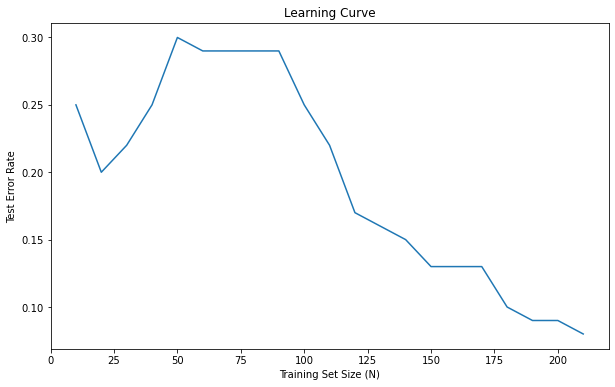

In [16]:
training_sizes = list(range(10, 211, 10))
test_errors_learning_curve = []

for N in training_sizes:
    N_class_0 = class_0.iloc[:max(1, N // 3)]
    N_class_1 = class_1.iloc[:max(1, N - len(N_class_0))]
    train_subset = pd.concat([N_class_0, N_class_1])
    
    X_train_learning_curve = train_subset.drop(columns=["class"])
    y_train_learning_curve = train_subset["class"]
        
    k_values_learning_curve = list(range(1, min(N, 207), 5)) 
    best_k_learning_curve = None
    best_error = float('inf')
    
    for k in k_values_learning_curve:
        KNN_learning_curve_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        KNN_learning_curve_temp.fit(X_train_learning_curve, y_train_learning_curve)
        y_test_pred_learning_curve_temp = KNN_learning_curve_temp.predict(X_test)
        error = 1 - accuracy_score(y_test, y_test_pred_learning_curve_temp)
        
        if error < best_error:
            best_k_learning_curve = k
            best_error = error
    
    KNN_learning_curve = KNeighborsClassifier(n_neighbors=best_k_learning_curve, metric='euclidean')
    KNN_learning_curve.fit(X_train_learning_curve, y_train_learning_curve)
    y_test_pred_learning_curve = KNN_learning_curve.predict(X_test)
    test_errors_learning_curve.append(1 - accuracy_score(y_test, y_test_pred_learning_curve))

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, test_errors_learning_curve)
plt.xlabel("Training Set Size (N)")
plt.ylabel("Test Error Rate")
plt.title("Learning Curve")
plt.show()

In [17]:
k_values_manhattan = list(range(1, 197, 5))  
best_k_manhattan = None
best_error_manhattan = float('inf')

for k in k_values_manhattan:
    KNN_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    KNN_manhattan.fit(X_train, y_train)
    y_test_pred_manhattan = KNN_manhattan.predict(X_test)
    error = 1 - accuracy_score(y_test, y_test_pred_manhattan)
    
    if error < best_error_manhattan:
        best_k_manhattan = k
        best_error_manhattan = error

print(f"Best k for Manhattan Distance (p=1): {best_k_manhattan} with Test Error: {best_error_manhattan:.4f}")



Best k for Manhattan Distance (p=1): 6 with Test Error: 0.1100


In [18]:
log_p_values = np.arange(0.1, 1.1, 0.1)  
p_values = 10 ** log_p_values  

best_p = None
best_p_error = float('inf')

for p in p_values:
    KNN = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='minkowski', p=p)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    
    if error < best_p_error:
        best_p = p
        best_p_error = error

best_log_p = np.log10(best_p)
print(f"Best log10(p): {best_log_p:.2f} with p = {best_p:.4f}")

Best log10(p): 0.60 with p = 3.9811


In [19]:
k_values_chebyshev = list(range(1, 201, 5)) 
best_k_chebyshev = None
best_error_chebyshev = float('inf')

for k in k_values_chebyshev:
    KNN = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    
    if error < best_error_chebyshev:
        best_k_chebyshev = k
        best_error_chebyshev = error

print(f"Best k for Chebyshev Distance: {best_k_chebyshev} with Test Error: {best_error_chebyshev:.4f}")

Best k for Chebyshev Distance: 16 with Test Error: 0.0800


In [22]:
k_values_mahalanobis = list(range(1, 201, 5))  
best_k_mahalanobis = None
best_error_mahalanobis = float('inf')


covariance_matrix = np.cov(X_train.T)
# np.cov = Estimate a covariance matrix
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)  
# np.linalg.inv = Compute the inverse of a matrix
metric_params = {'VI': inverse_covariance_matrix}  

for k in k_values_mahalanobis:
    KNN = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params=metric_params)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    
    if error < best_error_mahalanobis:
        best_k_mahalanobis = k
        best_error_mahalanobis = error

print(f"Best k for Mahalanobis Distance: {best_k_mahalanobis} with Test Error: {best_error_mahalanobis:.4f}")

Best k for Mahalanobis Distance: 1 with Test Error: 0.1700


In [23]:
results = [
    ["Manhattan", best_k_manhattan, best_error_manhattan],
    ["Minkowski (Best log10(p))", best_log_p, best_p_error],
    ["Chebyshev", best_k_chebyshev, best_error_chebyshev],
    ["Mahalanobis", best_k_mahalanobis, best_error_mahalanobis]
]

results_df = pd.DataFrame(results, columns=["Metric", "Best k / log10(p)", "Test Error"])
print("Summary of Test Errors for Different Distance Metrics:")
print(results_df)

Summary of Test Errors for Different Distance Metrics:
                      Metric  Best k / log10(p)  Test Error
0                  Manhattan                6.0        0.11
1  Minkowski (Best log10(p))                0.6        0.06
2                  Chebyshev               16.0        0.08
3                Mahalanobis                1.0        0.17


In [24]:
selected_metrics = {
    'euclidean': 'euclidean',
    'manhattan': 'manhattan',
    'chebyshev': 'chebyshev'
}

k_values = list(range(1, 197, 5))
weighted_results = []

for metric_name, metric in selected_metrics.items():
    best_k = None
    best_error = float('inf')
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        
        if error < best_error:
            best_k = k
            best_error = error
    
    weighted_results.append([metric_name, best_k, best_error])

weighted_results_df = pd.DataFrame(weighted_results, columns=["Metric", "Best k", "Test Error"])
print("Summary of Weighted KNN Test Errors:")
print(weighted_results_df)

Summary of Weighted KNN Test Errors:
      Metric  Best k  Test Error
0  euclidean       6        0.10
1  manhattan      26        0.10
2  chebyshev      16        0.11


In [25]:
best_metric = weighted_results_df.loc[weighted_results_df["Test Error"].idxmin(), "Metric"]
best_k = weighted_results_df.loc[weighted_results_df["Test Error"].idxmin(), "Best k"]
# .idxmin() = finds the index of the row with the lowest test error.
best_KNN = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights='distance')
best_KNN.fit(X_train, y_train)

y_train_pred = best_KNN.predict(X_train)

training_error = 1 - accuracy_score(y_train, y_train_pred)

print(f"Lowest Training Error Rate: {training_error:.4f}")


Lowest Training Error Rate: 0.0000
